In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np

In [13]:
df = pd.read_csv('/content/drive/MyDrive/2024 머신 코스 - 1/크롤링예제/incruit_result.csv')

In [14]:
df

,회사명,공고명,경력,학력,지역,고용형태,연봉,직무 분야,마감 기한,공고 링크
0,(주)매크로액트,인공지능 직무 경력 채용,1년↑,학력무관,경기>성남시 수정구,정규직,"3,500~4,000만원",빅데이터·AI(인공지능),상시,https://job.incruit.com/jobdb_info/jobpost.asp...
1,뉴로핏(주),인공지능 솔루션 영업,3년↑,학력무관,서울>강남구,정규직,NaN,"영업관리·영업지원, 영업기획, 기술영업",채용시,https://job.incruit.com/jobdb_info/jobpost.asp...
2,(주)아디아랩,인공지능 기술 개발자 모집,2년↑,학력무관,부산>해운대구,정규직,"3,200~3,500만원",응용프로그래머,채용시,https://job.incruit.com/jobdb_info/jobpost.asp...
3,주식회사 엠엠아이코퍼레이션,인공지능(AI) 신입 채용,신입,학력무관,경남>진주시,정규직,NaN,응용프로그래머,채용시,https://job.incruit.com/jobdb_info/jobpost.asp...
4,(주)카이어,인공지능 솔루션 (AI Solution) 개발,신입/10년미만,초대졸이상,서울>서초구,정규직,NaN,"응용프로그래머, 빅데이터·AI(인공지능)",상시,https://job.incruit.com/jobdb_info/jobpost.asp...
...,...,...,...,...,...,...,...,...,...,...
175,(주)플래티어,(주)플래티어 데이터솔루션사업추진단 데이터분석가 채용,신입,석사이상,서울>송파구,정규직,NaN,빅데이터·AI(인공지능),상시,https://job.incruit.com/jobdb_info/jobpost.asp...
176,(주)클레,[일자리매칭플랫폼] 3차원 머신비전 알고리즘 개발자,2년↑,학력무관,서울 외,정규직,NaN,빅데이터·AI(인공지능),~10.05 (토),https://job.incruit.com/jobdb_info/jobpost.asp...
177,래스(주),[일자리매칭플랫폼] [제형개발] 화장품 연구원 채용 공고,1년↑,대졸,강원 외,정규직,"시급 9,860원",빅데이터·AI(인공지능),~11.19 (화),https://job.incruit.com/jobdb_info/jobpost.asp...
178,주식회사 네오위즈,[네오위즈] AI 연구원 - 데이터 분석 (전문연구요원),3년↑,석사이상,경기>성남시 분당구,정규직,NaN,빅데이터·AI(인공지능),채용시,https://job.incruit.com/jobdb_info/jobpost.asp...


In [15]:
# 직무 분야와 공고명 컬럼 결합
text = ' '.join(df['직무 분야'].fillna('') + ' ' + df['공고명'].fillna(''))

In [16]:
# text = ' '.join(df['회사명'].fillna('') )

In [18]:
!apt-get install -y fonts-nanum
!fc-cache -fv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.9 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123599 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/

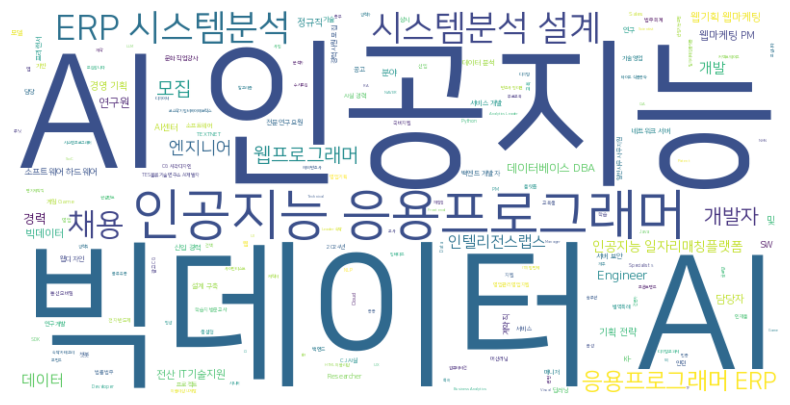

In [19]:
font_path = '/content/drive/MyDrive/Colab Notebooks/font/NanumSquareR.ttf'
# 워드 클라우드 생성
wordcloud = WordCloud(font_path=font_path,width=800, height=400, background_color='white').generate(text)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 숨김
plt.show()

In [24]:
# "job" 글자 모양 마스크 이미지 불러오기
mask_image = np.array(Image.open('/content/drive/MyDrive/2024 머신 코스 - 1/크롤링예제/mask.png'))  # "job" 모양의 마스크 이미지 파일 경로

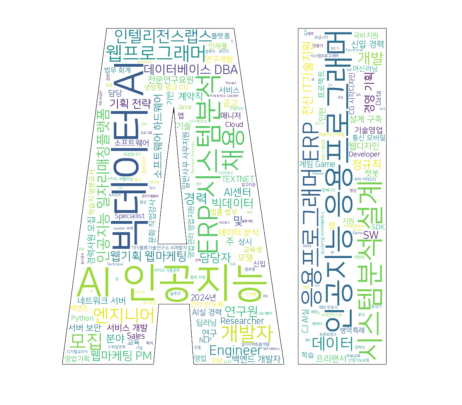

In [25]:
# 워드 클라우드 생성 (마스크 사용)
wordcloud = WordCloud(font_path=font_path, mask=mask_image, background_color='white', contour_color='black', contour_width=1).generate(text)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 숨김
plt.show()

In [28]:
df1 = pd.read_csv('/content/drive/MyDrive/2024 머신 코스 - 1/크롤링예제/saramin_result.csv')

In [29]:
df1

,회사명,공고명,학력,직무 분야,마감 기한,공고 링크
0,(주)더원테크,빅데이터 와 인공지능 AI 프로그램 개발자 모십니다.,대졸↑,"AI(인공지능), 딥러닝, Python, 머신러닝, 빅데이터 외 등록일 24/09/18",~ 10/18(금),https://www.saramin.co.kr/zf_user/jobs/relay/v...
1,대한상공회의소,[국비지원 무료교육] 반도체 로봇 빅데이터 인공지능 취업연계,학력무관,"AI(인공지능), AI(인공지능), 빅데이터, 보안컨설팅, 앱개발 외 수정일 24/...",~ 12/31(화),https://www.saramin.co.kr/zf_user/jobs/relay/v...
2,(사)한국아이씨티기술협회,[국비무료IT취업]자바파이썬/웹개발/빅데이터/인공지능,학력무관,"AI(인공지능), Python, 빅데이터, 솔루션, 기술지원 외 수정일 24/09/20",내일마감,https://www.saramin.co.kr/zf_user/jobs/relay/v...
3,(주)솔트룩스,인공지능(AI) 솔트룩스 - 교육사업팀 팀원,대졸↑,"AI(인공지능), Python, 웹개발, HRD, 교육운영 외 등록일 24/09/20",~ 10/20(일),https://www.saramin.co.kr/zf_user/jobs/relay/v...
4,(주)컴트루테크놀로지,"[AI인공지능/정보보안] 솔루션 기술지원 엔지니어 (세종, 서울)",초대졸↑,"AI(인공지능), 솔루션, 데이터엔지니어, SE(시스템엔지니어), IT영업 외 등록...",내일마감,https://www.saramin.co.kr/zf_user/jobs/relay/v...
...,...,...,...,...,...,...
195,엔에이치엔(주),[NHN] Game AI 연구 및 서비스 개발,학력무관,"AI(인공지능), 딥러닝, Python, C++, 머신러닝 외 등록일 24/08/27",채용시,https://www.saramin.co.kr/zf_user/jobs/relay/v...
196,(주)엘로이랩,[서울/AI 초분광 솔루션] AI Researcher 채용(신입/경력),석사↑,"AI(인공지능), 딥러닝, 알고리즘, C++, 머신러닝 외 수정일 24/08/06",~ 10/04(금),https://www.saramin.co.kr/zf_user/jobs/relay/v...
197,(주)유어라운드,"[생성AI]LLM, DIffusion 석사 연구원 채용",석사↑,"AI(인공지능), AI(인공지능), Python, 연구원, 솔루션 외 수정일 24/...",18시마감,https://www.saramin.co.kr/zf_user/jobs/relay/v...
198,(주)뉴엔에이아이,[신입/경력] AI Developer 팀원 채용,학력무관,"AI(인공지능), 딥러닝, Python, 알고리즘, 머신러닝 외 등록일 24/08/13",~ 10/12(토),https://www.saramin.co.kr/zf_user/jobs/relay/v...


In [30]:
# 직무 분야와 공고명 컬럼 결합
text = ' '.join(df['직무 분야'].fillna('') + ' ' + df1['공고명'].fillna(''))

In [ ]:
# text = ' '.join(df['회사명'].fillna('') )

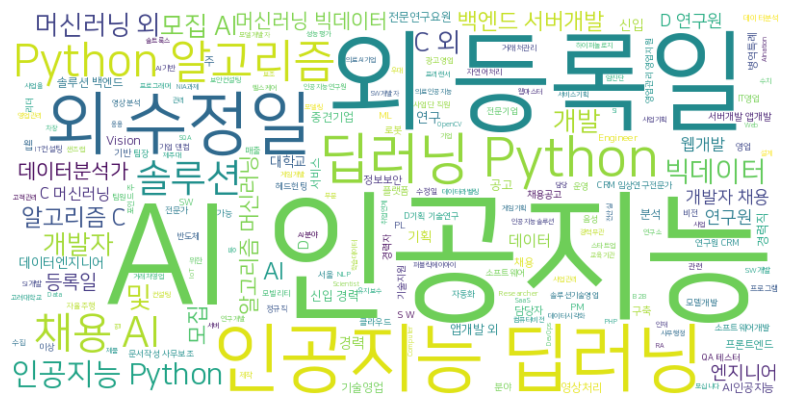

In [31]:
font_path = '/content/drive/MyDrive/Colab Notebooks/font/NanumSquareR.ttf'
# 워드 클라우드 생성
wordcloud = WordCloud(font_path=font_path,width=800, height=400, background_color='white').generate(text)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 숨김
plt.show()

In [32]:
# "job" 글자 모양 마스크 이미지 불러오기
mask_image = np.array(Image.open('/content/drive/MyDrive/2024 머신 코스 - 1/크롤링예제/mask.png'))  # "job" 모양의 마스크 이미지 파일 경로

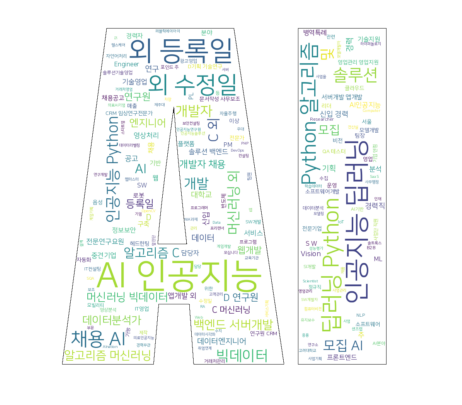

In [33]:
# 워드 클라우드 생성 (마스크 사용)
wordcloud = WordCloud(font_path=font_path, mask=mask_image, background_color='white', contour_color='black', contour_width=1).generate(text)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 숨김
plt.show()